<a href="https://colab.research.google.com/github/Niktomiro/Proyecto_Core_Parte_IV/blob/Develop/(Core)_Proyecto_parte_V_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Carga de librerías y datos:

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Cargamos los datos de la parte anterior
path = "/content/drive/MyDrive/BBDD SONDA/Retail_Sales_Dates_Clean.csv"
df = pd.read_csv(path)

# Comprobamos que se cargaran bien
df.head()
df.info()

# Quito las columnas que no van al caso
df.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"], axis = 0, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1000 non-null   int64  
 1   Unnamed: 0        1000 non-null   int64  
 2   Transaction ID    1000 non-null   int64  
 3   Date              1000 non-null   object 
 4   Customer ID       1000 non-null   object 
 5   Gender            1000 non-null   object 
 6   Age               1000 non-null   int64  
 7   Product Category  1000 non-null   object 
 8   Quantity          1000 non-null   int64  
 9   Price per Unit    1000 non-null   int64  
 10  Total Amount      1000 non-null   int64  
 11  Normalized Sales  1000 non-null   float64
 12  Category          903 non-null    object 
 13  Month             1000 non-null   int64  
 14  Year              1000 non-null   int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 117.3+ KB


#### Condicionamiento de datos para mapa de calor

In [197]:
# Hacemos una columna de día del mes para sacar la columna date del mapa
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day
df_heatmap = df.copy()
df_heatmap.drop(columns = "Date", axis = 0, inplace = True)
df_heatmap.info()

# Transcribamos los datos string para poder agregarlos a los mapas de calor
df_heatmap["Customer ID"] = df_heatmap["Customer ID"].str.replace("CUST", "")
df_heatmap["Customer ID"] = df_heatmap["Customer ID"].astype(int)
df_heatmap["Gender"] = df_heatmap["Gender"].apply(lambda x: 1 if x == "Male" else 2)
df_heatmap["Product Category"] = df_heatmap["Product Category"].apply(lambda x:
                                                      1 if x == "Beauty" else
                                                      2 if x == "Electronics" else
                                                      3)
df_heatmap["Category"] = df_heatmap["Category"].apply(lambda x:
                                                      1 if x == "Low" else
                                                      2 if x == "Medium" else
                                                      3)

# Descargar por si acaso
df_heatmap.to_csv("Retail_Sales_Heatmap_Data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   int64  
 1   Customer ID       1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Age               1000 non-null   int64  
 4   Product Category  1000 non-null   object 
 5   Quantity          1000 non-null   int64  
 6   Price per Unit    1000 non-null   int64  
 7   Total Amount      1000 non-null   int64  
 8   Normalized Sales  1000 non-null   float64
 9   Category          903 non-null    object 
 10  Month             1000 non-null   int64  
 11  Year              1000 non-null   int64  
 12  Day               1000 non-null   int32  
dtypes: float64(1), int32(1), int64(7), object(4)
memory usage: 97.8+ KB


#### Mapa de calor

In [ ]:
# Generación correlativo (Uso spearman porque es más robusro contra outliers y es eficiente con harta data)
corr_spearman = df_heatmap.corr(method='spearman')
print(corr_spearman)

                  Transaction ID  Customer ID    Gender       Age  \
Transaction ID          1.000000     1.000000 -0.010387  0.065314   
Customer ID             1.000000     1.000000 -0.010387  0.065314   
Gender                 -0.010387    -0.010387  1.000000 -0.002974   
Age                     0.065314     0.065314 -0.002974  1.000000   
Product Category        0.002921     0.002921 -0.035272  0.045621   
Quantity               -0.026795    -0.026795  0.027922 -0.023472   
Price per Unit         -0.067112    -0.067112 -0.019237 -0.037966   
Total Amount           -0.069331    -0.069331  0.009124 -0.037864   
Normalized Sales       -0.069331    -0.069331  0.009124 -0.037864   
Category               -0.048786    -0.048786  0.012328 -0.007759   
Month                   0.048267     0.048267  0.026767 -0.000875   
Year                   -0.010855    -0.010855 -0.045671  0.022841   
Day                    -0.004842    -0.004842  0.065152  0.044461   

                  Product Categor

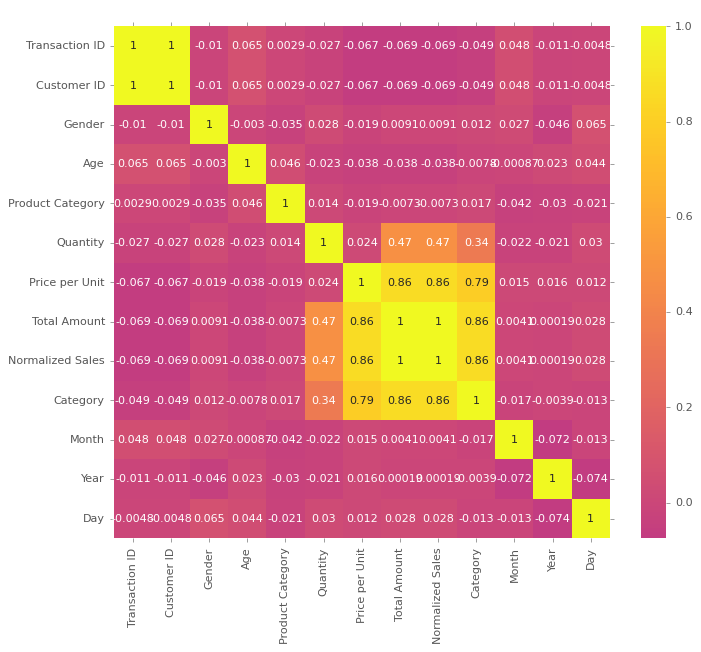

In [ ]:
from os import name
# Generación mapa con correlativo
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor - Correlación Spearman - Ventas tienda")
plt.show()
fig.savefig(dpi = 350, fname = "Mapa de calor de datos de ventas (Correlación Spearman).png", bbox_inches='tight')

#### Mapa de dispersión y otros

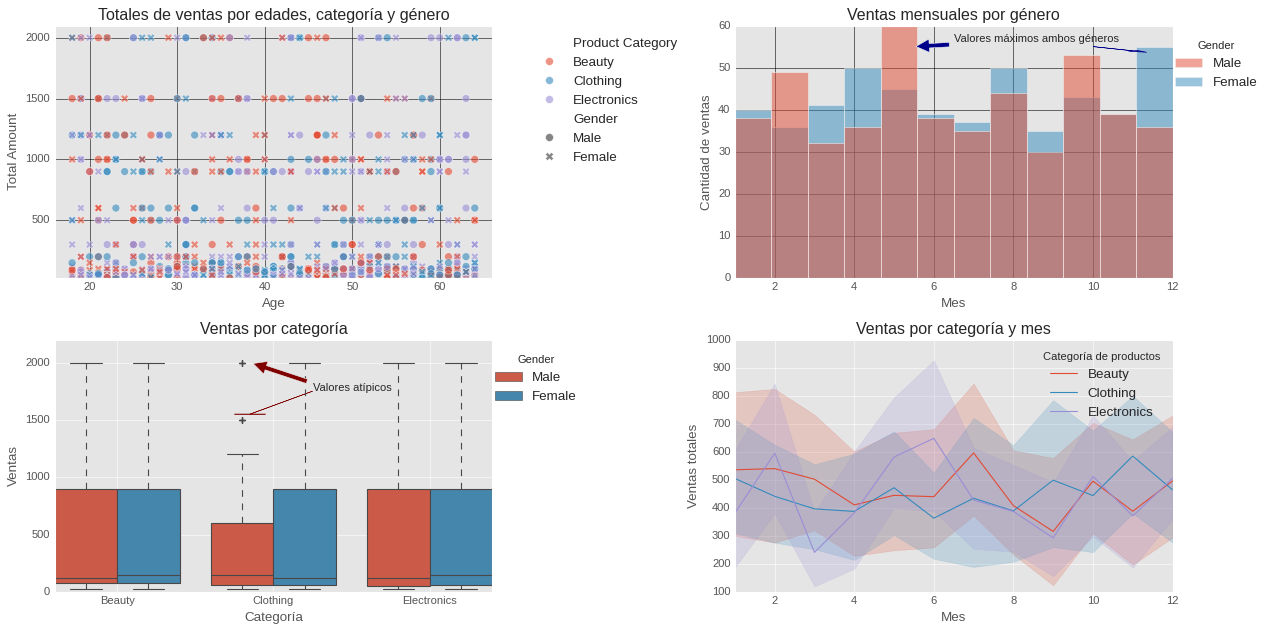

In [196]:
# Preparamos los subplots y los gráficos para mostrar los datos clave
fig = plt.figure(figsize = (16, 8))
plt.style.use('ggplot')
plt.subplot(2, 2, 1)
sns.scatterplot(data = df, x = "Age", y = "Total Amount", hue = "Product Category", style = "Gender", alpha = 0.6, s = 50)
plt.title("Totales de ventas por edades, categoría y género")
plt.legend(loc = "upper right", bbox_to_anchor=(1.45, 1))

# Para evitar que se descuadre, agregamos esto:
# Para el eje X (Month):
min_age = df['Age'].min()
max_age = df['Age'].max()

# Para el eje Y (Total Amount):
min_amount = df['Total Amount'].min()
max_amount = df['Total Amount'].max()
plt.xlim(16, max_age + 2)
plt.ylim(min_amount, max_amount + 100)
plt.grid(True, color = "black")

# Histograma de ventas por mes
plt.subplot(2, 2, 2)
axh = sns.histplot(data = df, x = "Month", hue = "Gender", bins = 12)
plt.title("Ventas mensuales por género")
plt.xlabel("Mes")
plt.ylabel("Cantidad de ventas")
sns.move_legend(
     axh, "lower center",
     bbox_to_anchor=(1.1, 0.7))
plt.xlim(1, 12)
plt.grid(True, color = "black")
# Anotación y flecha de mayores valores
axh.annotate('Valores máximos ambos géneros', xy=(5.5, 55), xytext=(6.5, 56),
            arrowprops = dict(facecolor = 'darkblue', shrink=0.05))
axh.arrow(10, 55, 1, -1, head_width= 0.3, head_length= 0.5, fc='darkblue', ec='darkblue')


# Boxplot de total ventas por categoría
plt.subplot(2, 2, 3)
axbp = sns.boxplot(data = df, x = "Product Category", y = "Total Amount", hue = "Gender")
plt.ylim(0, 2200)
plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt.grid(True)
plt.title("Ventas por categoría")
sns.move_legend(
    axbp, "lower center",
    bbox_to_anchor=(1.1, 0.7))
# Anotación y flecha de valores atípicos
axbp.annotate('Valores atípicos', xy=(0.85, 2000), xytext=(1.25, 1750),
            arrowprops = dict(facecolor = 'maroon', shrink=0.05))
axbp.arrow(1.25, 1750, -0.4, -200, head_width= 0.2, head_length= 0.2, fc='maroon', ec='maroon')

# Gráfico de línea
plt.subplot(2, 2, 4)
axl = sns.lineplot(data = df, x = "Month", y = "Total Amount", hue = "Product Category")
plt.xlabel("Mes")
plt.ylabel("Ventas totales")
plt.title("Ventas por categoría y mes")
plt.xlim(1, 12)
plt.legend(title = "Categoría de productos")

plt.tight_layout()
plt.show()
fig.savefig(dpi = 350, fname = "Estadísticas de ventas.png", bbox_inches='tight')